# Gerekli Kütüphanelerin İçe Aktarılması

Proje için gerekli kütüphaneler aşağıda listelenmiştir:


In [95]:
import numpy as np 
import pandas as pd 
import os

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from tqdm import tqdm
import cv2

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings("ignore")

# Veri Seti Dizini ve Sınıfların Listelenmesi

Aşağıda belirtilen dizinde bulunan veri seti yüklenir ve sınıflar (klasör isimleri) listelenir:

In [96]:
DIR = '/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset' 
classes = [i for i in os.listdir(DIR) if '.' not in i]                     
classes

['Hourse Mackerel',
 'Black Sea Sprat',
 'Sea Bass',
 'Red Mullet',
 'Trout',
 'Striped Red Mullet',
 'Shrimp',
 'Gilt-Head Bream',
 'Red Sea Bream']

# Görüntü Dosyalarının Yolları ve Etiketlerinin Elde Edilmesi

Bu kod, belirli bir dizinde bulunan tüm `.png` dosyalarının yollarını ve etiketlerini toplar. İşleyişi şu şekildedir:

In [97]:
label = []
path = []
for dir_name, _,filenames in os.walk(DIR):                    
    for filename in filenames:                                 
        if os.path.splitext(filename)[-1]=='.png':              
            if dir_name.split()[-1]!='GT':                       
                label.append(os.path.split(dir_name)[-1])         
                path.append(os.path.join(dir_name,filename))     

df = pd.DataFrame(columns=['path','label'])
df['path']=path
df['label']=label

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    9000 non-null   object
 1   label   9000 non-null   object
dtypes: object(2)
memory usage: 140.8+ KB


In [99]:
df['label'].value_counts()

label
Hourse Mackerel       1000
Black Sea Sprat       1000
Sea Bass              1000
Red Mullet            1000
Trout                 1000
Striped Red Mullet    1000
Shrimp                1000
Gilt-Head Bream       1000
Red Sea Bream         1000
Name: count, dtype: int64

In [100]:
df.head()

,path,label
0,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel
1,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel
2,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel
3,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel
4,/kaggle/input/a-large-scale-fish-dataset/Fish_...,Hourse Mackerel


# Farklı Sınıflardan Örnek Görüntülerin Görselleştirilmesi

Bu kod, veri setindeki her bir sınıftan bir örnek görüntüyü görselleştirir. İşleyişi şu şekildedir:

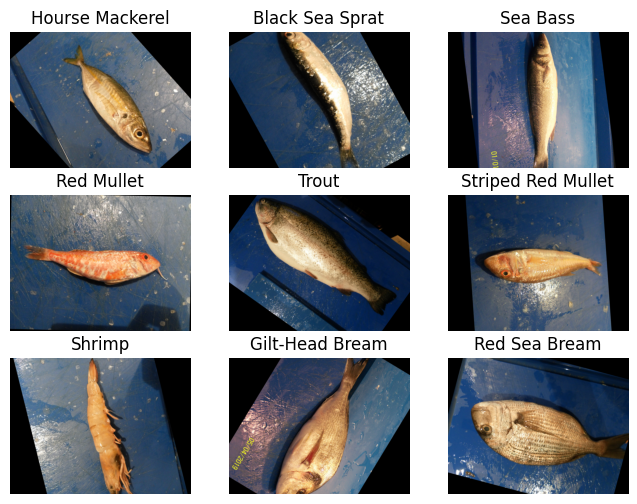

In [101]:
idx = 0
plt.figure(figsize=(8,6))
for unique_label in df['label'].unique():
    plt.subplot(3, 3, idx+1)
    plt.imshow(plt.imread(df[df['label']==unique_label].iloc[0,0]))
    plt.title(unique_label)
    plt.axis('off')
    idx+=1

# Belirli Sınıfa Ait Görsellerin Görselleştirilmesi

Bu kod, veri setinde sadece "Trout" etiketine sahip olan görüntüleri görselleştirir. İşleyişi şu şekildedir:

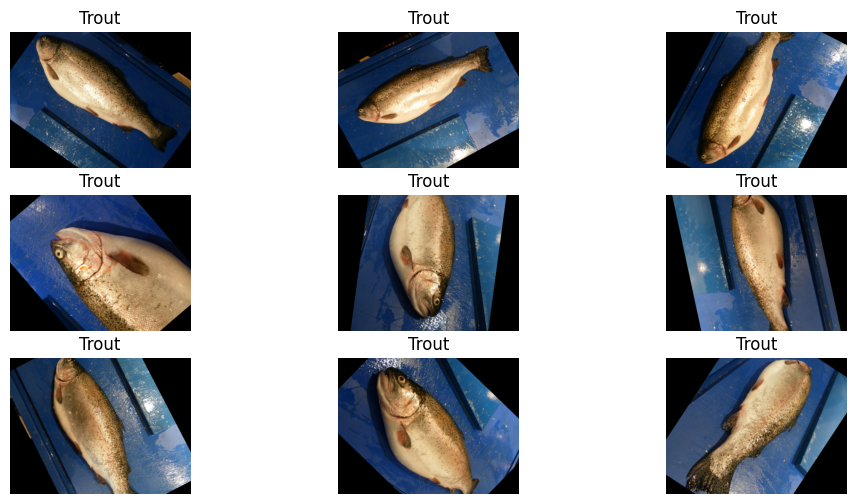

In [102]:
idx = 0
plt.figure(figsize=(12,6))
for unique_label in df['label'].unique():
    plt.subplot(3, 3, idx+1)
    plt.imshow(plt.imread(df[df['label']=="Trout"].iloc[idx,0]))
    plt.title("Trout")
    plt.axis('off')
    idx+=1

# Görüntülerin ve Etiketlerin Yüklenmesi

Bu kod, bir veri seti dizinindeki tüm görüntüleri ve ilgili etiketlerini yükleyerek bir listeye ekler. İşleyişi şu şekildedir:

In [103]:
main_directory = "/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset"
images = []
labels = []
for directory in tqdm(os.listdir(main_directory)):
    next_directory = f"{main_directory}/{directory}"
    if directory in ["README.txt", "license.txt", "Segmentation_example_script.m"]:
        continue
    i = 0
    for images_directory in os.listdir(next_directory):
        if "GT" not in images_directory:
            final_directory = f"{next_directory}/{images_directory}"
            for image in os.listdir(final_directory):
                # images.append(keras.utils.img_to_array(keras.utils.load_img(f"{final_directory}/{image}")))
                # labels.append(images_directory)
                images.append(cv2.resize(cv2.imread(f"{final_directory}/{image}"),(224, 224)).astype('float32') / 255)
                labels.append(images_directory)
        i+=1

100%|██████████| 12/12 [02:04<00:00, 10.33s/it]


In [104]:
print(images[0])

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


In [105]:
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, random_state=0, test_size=0.2)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, random_state=0, test_size = 0.5)

# Görüntü Verisi Augmentasyonu

Bu kod, görüntü verilerinin augmentasyonu için `ImageDataGenerator` sınıfını kullanır. İşleyişi şu şekildedir:

In [106]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
)
datagen.fit(X_train)

In [107]:
print(type(X_train))
print(X_train[0].shape)
print(X_val[0].shape)
print(X_test[0].shape)
len(X_train)

<class 'list'>
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


7200

In [108]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [109]:
print(y_train)

['Shrimp' 'Sea Bass' 'Striped Red Mullet' ... 'Trout' 'Red Mullet'
 'Sea Bass']


In [110]:
encoder = OneHotEncoder(sparse=False)
y_train = encoder.fit_transform(y_train.reshape(-1, 1))
y_val = encoder.transform(y_val.reshape(-1, 1))
y_test = encoder.transform(y_test.reshape(-1, 1))

In [111]:
print(y_train)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Sinir Ağı Modelinin Oluşturulması

Bu kod, TensorFlow ve Keras kullanarak bir sinir ağı modeli oluşturur. Modelin mimarisi şu şekildedir:

In [112]:
model = tf.keras.models.Sequential([
  # inputs 
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  # hiddens layers
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  # output layer
  tf.keras.layers.Dense(9,activation="softmax")
])

In [113]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Modelin Eğitimi

Bu kod, tanımlanan sinir ağı modelini eğitmek için kullanılır. İşleyişi şu şekildedir:

In [114]:
results = model.fit(X_train, y_train,
                    batch_size=64,
                    epochs=50,
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(
                            monitor='val_loss',
                            patience=3,
                            restore_best_weights=True
                        )
                    ],
                    validation_data=(X_val, y_val))

Epoch 1/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 54s 463ms/step - accuracy: 0.1876 - loss: 3.0967 - val_accuracy: 0.4189 - val_loss: 1.7200
Epoch 2/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 52s 462ms/step - accuracy: 0.3571 - loss: 1.7946 - val_accuracy: 0.5311 - val_loss: 1.4430
Epoch 3/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 63s 548ms/step - accuracy: 0.4449 - loss: 1.5757 - val_accuracy: 0.6267 - val_loss: 1.2825
Epoch 4/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 53s 470ms/step - accuracy: 0.5061 - loss: 1.4178 - val_accuracy: 0.6833 - val_loss: 1.1219
Epoch 5/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 54s 477ms/step - accuracy: 0.5610 - loss: 1.2869 - val_accuracy: 0.7467 - val_loss: 0.9370
Epoch 6/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 54s 478ms/step - accuracy: 0.5899 - loss: 1.1861 - val_accuracy: 0.7589 - val_loss: 0.8646
Epoch 7/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 56s 499ms/step - accuracy: 0.6193 - loss: 1.1010 - val_accuracy: 0.7644 - val_loss: 0.8340
Epoch 8/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 54s 480ms/step - accuracy: 0.6549 - loss: 1

# Model Eğitimi Sonrası Performans Grafikleri

Bu kod, modelin eğitim sürecinde kaydedilen kayıp (loss) ve doğruluk (accuracy) değerlerini görselleştirmek için kullanılır. İşleyişi şu şekildedir:

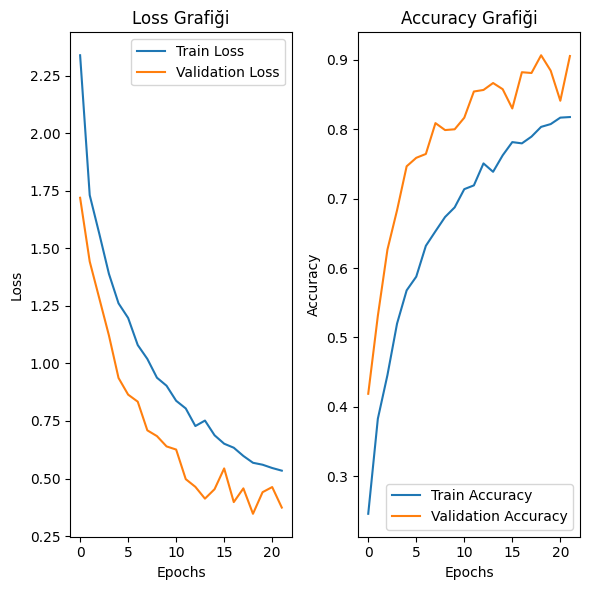

In [115]:
plt.figure(figsize=(6, 6))


plt.subplot(1, 2, 1)
plt.plot(results.history['loss'], label='Train Loss')
plt.plot(results.history['val_loss'], label='Validation Loss')
plt.title('Loss Grafiği')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(results.history['accuracy'], label='Train Accuracy')
plt.plot(results.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Grafiği')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [116]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


In [117]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.9164 - loss: 0.3406
Test Loss: 0.37336844205856323
Test Accuracy: 0.8955555558204651


In [118]:
test_labels = encoder.inverse_transform(y_test)
prediction_labels = encoder.inverse_transform(y_pred)

In [119]:
print(classification_report(test_labels, prediction_labels))

                    precision    recall  f1-score   support

   Black Sea Sprat       0.93      0.88      0.90       101
   Gilt-Head Bream       0.86      0.88      0.87        94
   Hourse Mackerel       0.87      0.94      0.90        98
        Red Mullet       0.97      0.98      0.98       101
     Red Sea Bream       0.88      0.95      0.91       104
          Sea Bass       0.82      0.93      0.87        89
            Shrimp       0.91      0.93      0.92       100
Striped Red Mullet       0.91      0.81      0.86       106
             Trout       0.91      0.77      0.83       107

          accuracy                           0.90       900
         macro avg       0.90      0.90      0.89       900
      weighted avg       0.90      0.90      0.89       900

